In [1]:
import warnings
warnings.filterwarnings(action="ignore")

## 1. 머신 러닝 (50점)
데이터 : 학생 성적에 관한 데이터세트 제공 394행짜리 소규모 데이터.

In [2]:
import pandas as pd
raw_df = pd.read_csv('./../data/student_data.csv')

In [3]:
df = raw_df.copy()
df.head()

,school,sex,paid,activities,famrel,freetime,goout,Dalc,Walc,health,absences,grade,G1,G2
0,GP,F,no,no,4.0,3.0,4.0,1.0,1.0,3.0,6.0,6,5,6
1,GP,F,no,no,5.0,3.0,3.0,1.0,1.0,3.0,4.0,5,5,5
2,GP,F,yes,no,4.0,3.0,2.0,2.0,3.0,3.0,10.0,8,7,8
3,GP,F,yes,yes,3.0,2.0,2.0,1.0,1.0,5.0,2.0,15,15,14
4,GP,F,yes,no,4.0,3.0,2.0,1.0,2.0,5.0,4.0,9,6,10


In [4]:
# 1-1. 시각화 포함 탐색적 자료분석을 시행하시오. (EDA)
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      395 non-null    object 
 1   sex         395 non-null    object 
 2   paid        395 non-null    object 
 3   activities  395 non-null    object 
 4   famrel      394 non-null    float64
 5   freetime    393 non-null    float64
 6   goout       392 non-null    float64
 7   Dalc        391 non-null    float64
 8   Walc        393 non-null    float64
 9   health      391 non-null    float64
 10  absences    392 non-null    float64
 11  grade       395 non-null    int64  
 12  G1          395 non-null    int64  
 13  G2          395 non-null    int64  
dtypes: float64(7), int64(3), object(4)
memory usage: 43.3+ KB


In [6]:
target_col = 'grade'

feature_cols = df.columns.drop(target_col)
feature_number_cols = df[feature_cols].select_dtypes(include='number').columns
feature_object_cols = df[feature_cols].select_dtypes(include='object').columns

In [7]:
# target_col EDA

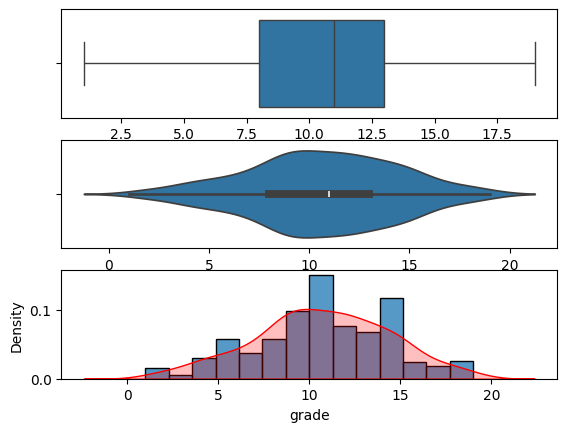

In [8]:
'''
target의 분포는 꽤나 정규성을 띄고 있음 
이후 train-test 분리를 할 때, stratify를 사용하지 않아도 될 것 같음
'''
fig, axes = plt.subplots(3, 1)
sns.boxplot(x=target_col, data=df, ax=axes[0])

sns.violinplot(x=target_col, data=df, ax=axes[1])

sns.histplot(x=target_col, data=df, ax=axes[2], stat='density')
sns.kdeplot(x=target_col, data=df, ax=axes[2], color='red', fill=True)
plt.show()

In [9]:
# feature_number_cols EDA

In [10]:
'''
number 타입의 데이터는 float과 int로 나뉘어져 있음
'''
df[feature_number_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   famrel    394 non-null    float64
 1   freetime  393 non-null    float64
 2   goout     392 non-null    float64
 3   Dalc      391 non-null    float64
 4   Walc      393 non-null    float64
 5   health    391 non-null    float64
 6   absences  392 non-null    float64
 7   G1        395 non-null    int64  
 8   G2        395 non-null    int64  
dtypes: float64(7), int64(2)
memory usage: 27.9 KB


In [11]:
'''
결측치가 존재하지만, 결측치 비율이 매우 낮음
이는 결측치를 제거하는 것보다는 다른 방법으로 처리하는 것이 좋을 것 같음
'''
df.isna().sum()/len(df)

school        0.000000
sex           0.000000
paid          0.000000
activities    0.000000
famrel        0.002532
freetime      0.005063
goout         0.007595
Dalc          0.010127
Walc          0.005063
health        0.010127
absences      0.007595
grade         0.000000
G1            0.000000
G2            0.000000
dtype: float64

In [12]:
'''
값들의 scale 차이가 크지는 않지만, 완전히 동일한 것도 아니기에 scaling이 필요할 수 있음
'''
df[feature_number_cols].describe()

,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
count,394.000000,393.000000,392.000000,391.000000,393.000000,391.000000,392.000000,395.000000,395.000000
mean,3.944162,3.239186,3.114796,1.470588,2.284987,3.562660,5.676020,10.908861,10.713924
std,0.897794,0.994265,1.112397,0.873266,1.287778,1.386949,8.013393,3.319195,3.761505
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000
25%,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000
50%,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000
75%,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000


<Axes: >

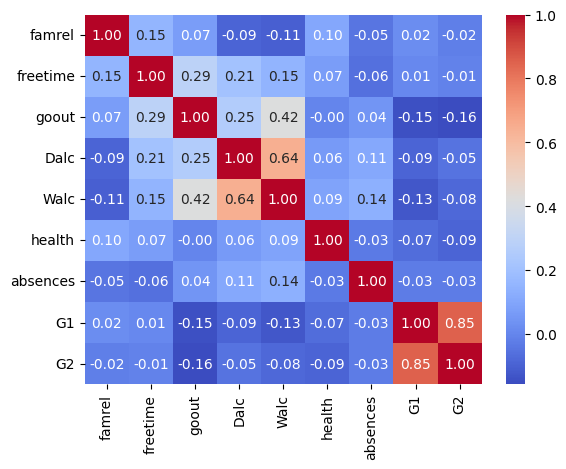

In [13]:
'''
G1과 G2가 상당히 높은 양의 상관관계를 가지고 있음   -> 0.85
Walc와 Dalc도 유의미한 양의 상관관계를 가지고 있음  -> 0.64
이후 사용 모델에 따라서 다중공선성이 발생할 수 있음
'''
sns.heatmap(df[feature_number_cols].corr(), annot=True, fmt='.2f', cmap='coolwarm')

In [14]:
# feature_object_cols EDA

In [15]:
'''
object 타입의 데이터는 결측치는 존재하지 않음
'''
df[feature_object_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   paid        395 non-null    object
 3   activities  395 non-null    object
dtypes: object(4)
memory usage: 12.5+ KB


In [16]:
'''
object 타입의 데이터는 대부분 서열척도보다는 명목척도에 가까움
따라서, one-hot encoding을 사용할 수 있음
또한 모든 데이터가 binary로 이루어져 있음

school의 경우에는 데이터의 불균형이 존재함
'''
for col in feature_object_cols:
    print(f'{df[col].value_counts()}')
    

school
GP    349
MS     46
Name: count, dtype: int64
sex
F    208
M    187
Name: count, dtype: int64
paid
no     214
yes    181
Name: count, dtype: int64
activities
yes    201
no     194
Name: count, dtype: int64


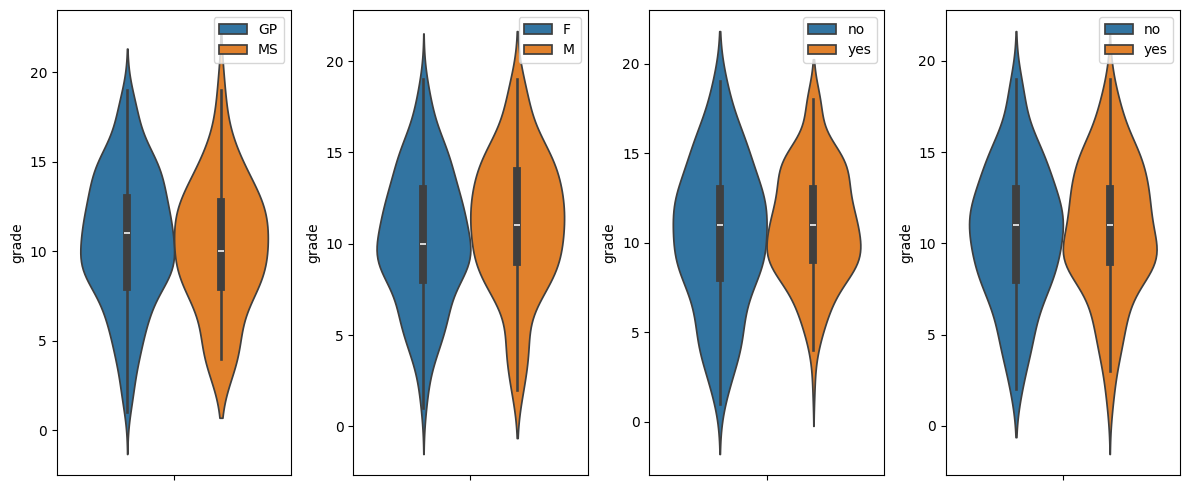

In [17]:
'''
일단 범주형 데이터에 따라서 target의 분포가 특이한 것은 없어보임
'''
fig, axes = plt.subplots(1, 4, figsize=(12, 5))
for i, col in enumerate(feature_object_cols):
    sns.violinplot(hue=col, y=target_col, data=df, ax=axes[i])
    axes[i].legend(loc='upper right')
plt.tight_layout()
plt.show()

In [18]:
# 1-2. 결측치 식별하고 결측치를 예측하는 두 가지 방법 정도를 쓰고, 선택한 이유를 설명하시오.

In [19]:
'''
결측치 식별 방법
    : df.isna().sum()을 통해 결측치의 개수를 확인할 수 있음
    : df.isna().sum()/len(df)을 통해 결측치의 비율을 확인할 수 있음

결측치를 예측하는 두 가지 방법
    : 단순대치법
        : 단순히 결측치를 제거하거나, 평균, 중앙값, 최빈값 등으로 대치하는 방법
        : 수치형 데이터의 경우에는 평균, 중앙값 등으로 대치할 수 있음
        : 범주형 데이터의 경우에는 최빈값으로 대치할 수 있음
        
    : KNN을 통한 결측치 예측 방법
        : KNN은 비지도 학습 방법 중 하나로, 유사한 데이터들을 찾아서 예측하는 방법


이번 경우에는 모든 row가 결측치를 가지고 있지 않기 때문에, KNN을 통한 결측치 예측 방법을 사용할 수 있을 것 같음

'''
df[df.isna().any(axis=1)]

,school,sex,paid,activities,famrel,freetime,goout,Dalc,Walc,health,absences,grade,G1,G2
9,GP,M,yes,yes,5.0,5.0,NaN,1.0,1.0,5.0,0.0,15,14,15
14,GP,M,no,no,NaN,5.0,2.0,1.0,1.0,3.0,0.0,15,14,16
15,GP,F,no,no,4.0,4.0,4.0,1.0,2.0,2.0,NaN,14,14,14
25,GP,F,yes,no,1.0,2.0,2.0,1.0,NaN,5.0,14.0,8,6,9
39,GP,F,yes,yes,4.0,3.0,1.0,1.0,1.0,NaN,8.0,13,14,13
40,GP,F,no,yes,3.0,3.0,NaN,1.0,2.0,3.0,25.0,9,7,10
49,GP,F,no,yes,4.0,4.0,4.0,1.0,1.0,NaN,2.0,7,7,7
61,GP,F,no,yes,5.0,5.0,5.0,NaN,5.0,5.0,6.0,10,10,8
71,GP,M,no,no,3.0,3.0,3.0,NaN,1.0,3.0,0.0,10,10,10
82,GP,F,yes,no,4.0,4.0,4.0,1.0,1.0,5.0,NaN,6,7,6


In [20]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
df[feature_number_cols] = imputer.fit_transform(df[feature_number_cols])
df.isna().sum()

school        0
sex           0
paid          0
activities    0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
grade         0
G1            0
G2            0
dtype: int64

In [21]:
# 1-3. 범주형 변수 인코딩이 필요한 경우를 식별하고, 변환을 적용하시오. 선택한 이유를 설명하시오.

In [22]:
'''
범주형 변수에 따른 target 값의 차이가 크지 않았다. 다만 이것만으로 범주형 변수를 활용하지 않을 이유는 없다.
따라서 모든 범주형 변수를 활용하기로 한다, 범주형 변수의 특성을 볼때 서열척도보다는 명목척도에 가까워보인다.
따라서 one-hot encoding을 사용하기로 한다.
'''
df = pd.concat([
    df[feature_number_cols],
    pd.get_dummies(df[feature_object_cols]).astype(int),
    df[target_col]
], axis=1)

In [23]:
# 1.4. 데이터 분할 방법을 2가지 쓰고 적절한 데이터 분할을 적용. 선택한 이유 설명하시오.

In [24]:
'''
데이터 분할 방법은 크게 2가지로 나눌 수 있다.

무작위 랜덤 분할법
    : 데이터를 무작위로 나누는 방법
    : 이후 모델이 접하게 될 테스트 데이터와 가장 유사한 데이터를 만들어낼 수 있음
    : 다만 데이터의 불균형이 존재할 경우, 불균형한 데이터가 나눠질 수 있음

계층적 분할법
    : 데이터를 특정한 기준에 따라 나누는 방법
    : 만약 데이터의 불균형이 심할 경우, train과 test 데이터가 불균형하게 나눠질 수 있음
    : 이를 방지하기 위해 stratify를 사용할 수 있음

이번 경우에는 target의 분포가 정규성을 띄고 있기 때문에, 무작위 랜덤 분할법을 사용하기로 한다.
'''
from sklearn.model_selection import train_test_split

X = df.drop(columns=[target_col])
y = df[target_col]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((316, 17), (79, 17), (316,), (79,))

In [25]:
# 1.5. svm, xgboost, randomforest 3개의 알고리즘 공통점을 쓰고 학생성적 예측 분석에 적합한 알고리즘인지 설명하시오.

In [26]:
'''
svm, xgboost, randomforest 3개의 알고리즘 공통점
    1. 모두 분류와 회귀에 활용 가능한 알고리즘이다.
    2. 모두 number 타입의 데이터에 적합한 알고리즘이다.
    3. 모두 과소적합, 과대적합 방지를 위해 적절한 하이퍼파라미터를 설정해야 한다.
'''

'\nsvm, xgboost, randomforest 3개의 알고리즘 공통점\n    1. 모두 분류와 회귀에 활용 가능한 알고리즘이다.\n    2. 모두 number 타입의 데이터에 적합한 알고리즘이다.\n    3. 모두 과소적합, 과대적합 방지를 위해 적절한 하이퍼파라미터를 설정해야 한다.\n'

In [27]:
# 1.6. 세 가지 모델 모두 모델링 해보고 가장 적합한 알고리즘 선택하고 이유 설명. 한계점 설명하고 보완 가능한 부분 설명하고,
# 현업에서 사용시 주의할 점 등에 대해 기술하시오.
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error

In [28]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [29]:
from sklearn.svm import SVR
params = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.1, 1, 10, 100],
}
grid_search = GridSearchCV(SVR(), param_grid=params, cv=5, n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

svr = SVR(**grid_search.best_params_)
svr.fit(X_train_scaled, y_train)

y_train_pred = svr.predict(X_train_scaled)
y_test_pred = svr.predict(X_test_scaled)

print(grid_search.best_params_)
print(f'train r2_score: {r2_score(y_train, y_train_pred)}')
print(f'train rmse: {np.sqrt(mean_squared_error(y_train, y_train_pred))}')

print(f'test r2_score: {r2_score(y_test, y_test_pred)}')
print(f'test rmse: {np.sqrt(mean_squared_error(y_test, y_test_pred))}')

{'C': 10, 'gamma': 0.1}
train r2_score: 0.9956258411986838
train rmse: 0.2416145758477304
test r2_score: 0.8720033114091316
test rmse: 1.410960288140129


In [30]:
from xgboost import XGBRegressor
params = {
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [3, 5, 7],
}
grid_search = GridSearchCV(XGBRegressor(), param_grid=params, cv=5, n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

xgbr = XGBRegressor(**grid_search.best_params_)
xgbr.fit(X_train_scaled, y_train)

y_train_pred = xgbr.predict(X_train_scaled)
y_test_pred = xgbr.predict(X_test_scaled)

print(grid_search.best_params_)
print(f'train r2_score: {r2_score(y_train, y_train_pred)}')
print(f'train rmse: {np.sqrt(mean_squared_error(y_train, y_train_pred))}')

print(f'test r2_score: {r2_score(y_test, y_test_pred)}')
print(f'test rmse: {np.sqrt(mean_squared_error(y_test, y_test_pred))}')

{'learning_rate': 0.1, 'max_depth': 3}
train r2_score: 0.9873226284980774
train rmse: 0.41132973265802136
test r2_score: 0.9604771733283997
test rmse: 0.7840422696718922


In [31]:
from sklearn.ensemble import RandomForestRegressor
params = {
    'max_depth': [3, 5, 7],
    'max_features': [0.3, 0.5, 0.7],
}


grid_search = GridSearchCV(RandomForestRegressor(), param_grid=params, cv=5, n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

rfr = RandomForestRegressor(**grid_search.best_params_)
rfr.fit(X_train_scaled, y_train)

y_train_pred = rfr.predict(X_train_scaled)
y_test_pred = rfr.predict(X_test_scaled)

print(grid_search.best_params_)
print(f'train r2_score: {r2_score(y_train, y_train_pred)}')
print(f'train rmse: {np.sqrt(mean_squared_error(y_train, y_train_pred))}')

print(f'test r2_score: {r2_score(y_test, y_test_pred)}')
print(f'test rmse: {np.sqrt(mean_squared_error(y_test, y_test_pred))}')

{'max_depth': 7, 'max_features': 0.7}
train r2_score: 0.9914820381866609
train rmse: 0.33716594423592006
test r2_score: 0.9586639694260652
test rmse: 0.8018253978046768


In [32]:
'''
test r2_score를 기준으로 하였을 때, xgboost가 가장 높은 성능을 보였다.
test rmse를 기준으로 하였을 때는 randomforest가 가장 높은 성능을 보였다.
모델의 적용 상황에 따라서 어떤 지표를 중요시 생각하느냐에 따라 모델 선택이 달라질 수 있지만, 일반적인 경우에는 r2_score를 기준으로 모델을 선택하는 것이 좋을 것 같다.

현업 활용시 주의사항
train score와 test score의 차이가 꽤 크기 때문에 과적합 가능성을 염두하고 모델을 파라미터 튜닝이 필요할 수 있다.
train-validate-test 세가지 데이터 셋을 활용하여 과적합의 정도를 명확히 파악하고 다양한 모델을 살펴보는 것이 좋을 수 있다.
G1, G2의 경우 target과 상당히 상관관계가 높았는데, 이 변수를 어떤 식으로 처리하느냐에 따라 일반화 성능이 달라질 수 있을 것으로 보인다.
'''

'\ntest r2_score를 기준으로 하였을 때, xgboost가 가장 높은 성능을 보였다.\ntest rmse를 기준으로 하였을 때는 randomforest가 가장 높은 성능을 보였다.\n모델의 적용 상황에 따라서 어떤 지표를 중요시 생각하느냐에 따라 모델 선택이 달라질 수 있지만, 일반적인 경우에는 r2_score를 기준으로 모델을 선택하는 것이 좋을 것 같다.\n\n현업 활용시 주의사항\ntrain score와 test score의 차이가 꽤 크기 때문에 과적합 가능성을 염두하고 모델을 파라미터 튜닝이 필요할 수 있다.\ntrain-validate-test 세가지 데이터 셋을 활용하여 과적합의 정도를 명확히 파악하고 다양한 모델을 살펴보는 것이 좋을 수 있다.\nG1, G2의 경우 target과 상당히 상관관계가 높았는데, 이 변수를 어떤 식으로 처리하느냐에 따라 일반화 성능이 달라질 수 있을 것으로 보인다.\n'

##  2. 통계분석 (50점) 

In [33]:
# 2. 회귀분석 문제. DATA = boston data (연속형 독립변수 1개, 종속변수 1개로 구성된 보스턴 집값 데이터셋)  (총 29점 )

In [34]:
import mglearn
X,y = mglearn.datasets.load_extended_boston()

In [35]:
# 2-1. 데이터 8:2로 분할하고 선형회귀 적용하시오. 결정계수와 rmse 구하시오<br>

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

y_train_pred = lr.predict(X_train_scaled)
y_test_pred = lr.predict(X_test_scaled)

print(f'train r2_score: {r2_score(y_train, y_train_pred)}')
print(f'train rmse: {np.sqrt(mean_squared_error(y_train, y_train_pred))}')

print(f'test r2_score: {r2_score(y_test, y_test_pred)}')
print(f'test rmse: {np.sqrt(mean_squared_error(y_test, y_test_pred))}')

train r2_score: 0.9409317027113498
train rmse: 2.265273503151904
test r2_score: 0.8055829447972158
test rmse: 3.775889056753325


In [39]:
# 2-2. 데이터 8:2로 분할하고 릿지 회귀 적용하시오.
# alpha 값을 0부터 1까지 0.1단위로 모두 탐색해서 결정계수가 가장 높을때의 알파를 찾고,
# 해당 알파로 다시 모델을 학습해서 결정계수와 rmse를 계산

from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

params = {
    'alpha': np.arange(0, 1.1, 0.1)
}

grid_search_cv = GridSearchCV(Ridge(), param_grid=params, cv=5, n_jobs=-1)
grid_search_cv.fit(X_train_scaled, y_train)
ridge = Ridge(**grid_search_cv.best_params_)
ridge.fit(X_train_scaled, y_train)

y_train_pred = ridge.predict(X_train_scaled)
y_test_pred = ridge.predict(X_test_scaled)

print(grid_search_cv.best_params_)
print(f'train r2_score: {r2_score(y_train, y_train_pred)}')
print(f'train rmse: {np.sqrt(mean_squared_error(y_train, y_train_pred))}')

print(f'test r2_score: {r2_score(y_test, y_test_pred)}')
print(f'test rmse: {np.sqrt(mean_squared_error(y_test, y_test_pred))}')

{'alpha': 1.0}
train r2_score: 0.9284649387149563
train rmse: 2.4928887394408457
test r2_score: 0.8324956802662203
test rmse: 3.5048146116127747


/opt/homebrew/anaconda3/envs/general/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=5.0104e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


In [50]:
# 2-3. 데이터 8:2로 분할하고 라쏘 회귀 적용하시오.
# alpha 값을 0부터 1까지 0.1단위로 모두 탐색해서 결정계수가 가장 높을때의 알파를 찾고,
# 해당 알파로 다시 모델을 학습해서 결정계수와 rmse를 계산

from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

params = {
    'alpha': np.arange(0, 1.1, 0.1)
}

grid_search_cv = GridSearchCV(Lasso(), param_grid=params, cv=5, n_jobs=-1)
grid_search_cv.fit(X_train_scaled, y_train)
lasso = Lasso(**grid_search_cv.best_params_)
lasso.fit(X_train_scaled, y_train)

y_train_pred = lasso.predict(X_train_scaled)
y_test_pred = lasso.predict(X_test_scaled)

print(grid_search_cv.best_params_)
print(f'train r2_score: {r2_score(y_train, y_train_pred)}')
print(f'train rmse: {np.sqrt(mean_squared_error(y_train, y_train_pred))}')

print(f'test r2_score: {r2_score(y_test, y_test_pred)}')
print(f'test rmse: {np.sqrt(mean_squared_error(y_test, y_test_pred))}')

{'alpha': 0.1}
train r2_score: 0.8620609448754437
train rmse: 3.4616809847489085
test r2_score: 0.8236103582310026
test rmse: 3.5965705527925764


/opt/homebrew/anaconda3/envs/general/lib/python3.11/site-packages/sklearn/base.py:1473: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/opt/homebrew/anaconda3/envs/general/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/opt/homebrew/anaconda3/envs/general/lib/python3.11/site-packages/sklearn/base.py:1473: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/opt/homebrew/anaconda3/envs/general/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  m

In [ ]:
# 3. 독립변수 하나 종속변수 하나 소규모 데이터 다항회귀(12점)
# 다항 회귀를 3차까지 적용시켜 계수를 구하고 각 차수별 데이터포인트 스캐터 플롯과 기울기 선을 그리세요.

In [51]:
import pandas as pd
import numpy as np

## 데이터 불러오기 
m = 100
X = 6 * np.random.rand(m,1) - 3
y = 3 * X**3  + X**2 + 2*X + 2 + np.random.randn(m,1)  #노이즈 포함

line = np.linspace(-3,3,100, endpoint=False).reshape(-1,1)

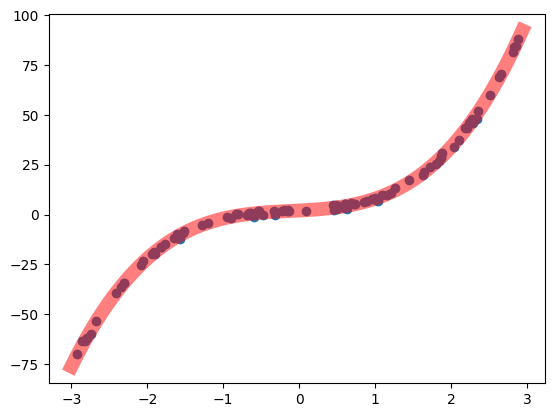

In [75]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly = PolynomialFeatures(degree=3, include_bias=False)
poly_X = poly.fit_transform(X)
poly_line = poly.transform(line)

lr = LinearRegression()
lr.fit(poly_X, y)
plt.scatter(X, y)
plt.plot(line, lr.predict(poly_line), color='red',linewidth=10,alpha=0.5)

4. ANOVA분석 (9점)<br>
변수 3개(하나는 범주형 변수/ 나머지 두 개는 수치형 연속변수)<br>
이원분산분석을 수행하고 통계표를 작성하시오.<br>

분산분석은 종속변수(반응변수)에 대해 두 개의 범주형 변수 A,B의 영향을 알아보기 위해 사용되는 검증 방법이다.

- <b>가. 상호작용효과 검정에 대한 가설</b><br>
1) 귀무가설 H0: region과 avocado type 간에는 상호작용 효과가 없다. <br>
2) 대립가설 H1: region과 avocado type 간에는 상호작용 효과가 있다. <br>


- <b>나. 주효과 검정에 대한 가설</b> <br>
1) 귀무가설 H0: region 종류에 따른 AveragePrice 차이는 존재하지 않는다. <br>
2) 대립가설 H1: region 종류에 따른 AveragePrice 차이는 존재한다. <br> 
3) 귀무가설 H0: type 종류에 따른 AveragePrice 차이는 존재하지 않는다. <br>
4) 대립가설 H1: type 종류에 따른 AveragePrice 차이는 존재한다. <br> 
<br> 


In [84]:
import pandas as pd
raw_df = pd.read_csv('../data/avocado.csv')

raw_df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [86]:
df = raw_df.copy()
df = df.loc[:, ['AveragePrice', 'region', 'type']]
using_regions = df['region'].drop_duplicates().sample(3)

df = df[df['region'].isin(using_regions)].reset_index(drop=True)

In [87]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

formula = 'AveragePrice ~ region + type + region:type'
model = ols(formula=formula, data=df).fit()
anova_table = anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
region,1.182530,2.0,9.346969,9.505060e-05
type,69.596578,1.0,1100.212058,1.491240e-163
region:type,13.066429,2.0,103.279810,1.613203e-41
Residual,63.573709,1005.0,NaN,NaN


In [88]:
if anova_table.loc['region', 'PR(>F)'] < 0.05:
    print('region은 AveragePrice에 영향을 미친다.')
else:
    print('region은 AveragePrice에 영향을 미치지 않는다.')

if anova_table.loc['type', 'PR(>F)'] < 0.05:
    print('type은 AveragePrice에 영향을 미친다.')
else:
    print('type은 AveragePrice에 영향을 미치지 않는다.')


if anova_table.loc['region:type', 'PR(>F)'] < 0.05:
    print('region과 type의 상호작용이 존재한다.')
else:
    print('region과 type의 상호작용이 존재하지 않는다.')

region은 AveragePrice에 영향을 미친다.
type은 AveragePrice에 영향을 미친다.
region과 type의 상호작용이 존재한다.


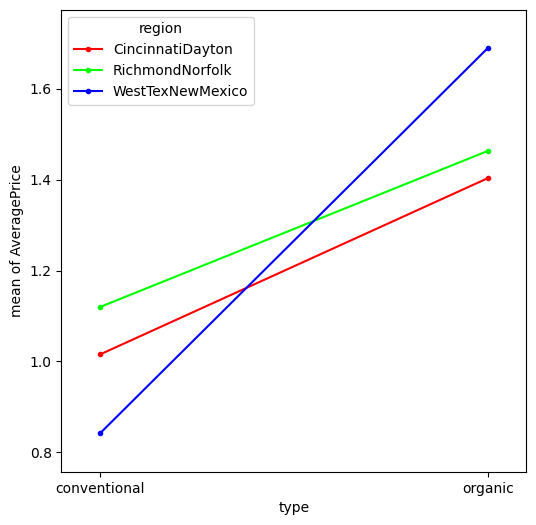

In [89]:
# 사후검정
from statsmodels.graphics.factorplots import interaction_plot
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(6, 6))
fig = interaction_plot(df['type'], df['region'], df['AveragePrice'], ax=ax)